if you want to revert changes you've made on the dataframes -> restart the session and then run the 'Brfore' section again.

# Before

## pips and includes

In [1]:
import pandas as pd
import requests
import json
from datetime import datetime
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## Constants

In [2]:
DATA_DIRECTORY = "../data/"
na_values = ['None', 'null', '-', '', ' ', 'NaN', 'nan', 'NAN']

## load csv files:

In [3]:
data_files = [f for f in os.listdir(DATA_DIRECTORY) if f.endswith('.csv')]

dataframes = {}
for file in tqdm(data_files, desc="Loading CSV files"):
    file_path = os.path.join(DATA_DIRECTORY, file)
    df_name = os.path.splitext(file)[0]
    dataframes[df_name] = pd.read_csv(file_path, low_memory=False, na_values=na_values)


Loading CSV files:   0%|          | 0/70 [00:00<?, ?it/s]

Loading CSV files: 100%|██████████| 70/70 [02:55<00:00,  2.50s/it]


# Preprocessing

## Remove unecesery columns

### remove 'Time' column:

In [13]:
for df_name, df in dataframes.items():
    if 'Time' in df.columns:
        df.drop(columns=['Time'], inplace=True)

### remove radiation columns:

In [16]:
columns_to_remove = ['Grad (w/m^2)', 'DiffR (w/m^2)', 'NIP (w/m^2)']

for df_name, df in dataframes.items():
    df.drop(columns=[col for col in columns_to_remove if col in df.columns], inplace=True)


### remove 'BP' column:

In [18]:
for df_name, df in dataframes.items():
    if 'BP (hPa)' in df.columns:
        df.drop(columns=['BP (hPa)'], inplace=True)

### remove the 'Ws10mm (m/s)' , 'Ws1mm (m/s)' colums:

In [4]:
for df_name, df in dataframes.items():
    columns_to_remove = ['Ws10mm (m/s)', 'Ws1mm (m/s)']
    df.drop(columns=[col for col in columns_to_remove if col in df.columns], inplace=True)

## Time

### format the time:

In [22]:
for df_name, df in dataframes.items():
    if 'Date Time' in df.columns:
        df['Date Time'] = pd.to_datetime(df.pop('Date Time'), format="%d/%m/%Y %H:%M")

### add column with the year:

In [24]:
for df_name, df in dataframes.items():
    if 'Date Time' in df.columns:
        df['Year'] = df['Date Time'].dt.year

### time cicles (days ans years):

In [29]:
day = 24*60*60
year = (365.2425)*day

for df_name, df in dataframes.items():
    if 'Date Time' in df.columns:
        timestamp_s = df['Date Time'].map(pd.Timestamp.timestamp)
        df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
        df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
        df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
        df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
        df.drop(columns=['Date Time'], inplace=True)


## Data Imputation

### 1 missing value:

In [ ]:
na_values = ['None', 'null', '-', '', ' ', 'NaN', 'nan', 'NAN']

for df_name, df in tqdm(dataframes.items(), desc="Processing DataFrames"):
    if 'TD (degC)' in df.columns:
        df['TD (degC)'].replace(na_values, np.nan, inplace=True)
        
        # Fill NaN values wrapped with two non-NaN values:
        nan_wrapped_count = 0
        td_values = df['TD (degC)'].values
        for i in range(1, len(td_values) - 1):
            if pd.isna(td_values[i]) and not pd.isna(td_values[i - 1]) and not pd.isna(td_values[i + 1]):
                try:
                    td_values[i] = (float(td_values[i - 1]) + float(td_values[i + 1])) / 2
                    nan_wrapped_count += 1
                except ValueError as e:
                    print(f"ValueError encountered in {df_name} at index {i}: {e}")
        print(f"Number of NaN values wrapped with two non-NaN values and filled in {df_name} station: {nan_wrapped_count} which is {nan_wrapped_count / len(df) * 100}% of the data")

In [ ]:
na_values = ['None', 'null', '-', '', ' ', 'NaN', 'nan', 'NAN']

for df_name, df in tqdm(dataframes.items(), desc="Processing DataFrames"):
    if 'TDmax (degC)' in df.columns:
        df['TDmax (degC)'].replace(na_values, np.nan, inplace=True)
        
        # Fill NaN values wrapped with two non-NaN values:
        nan_wrapped_count = 0
        td_values = df['TDmax (degC)'].values
        for i in range(1, len(td_values) - 1):
            if pd.isna(td_values[i]) and not pd.isna(td_values[i - 1]) and not pd.isna(td_values[i + 1]):
                try:
                    td_values[i] = (float(td_values[i - 1]) + float(td_values[i + 1])) / 2
                    nan_wrapped_count += 1
                except ValueError as e:
                    print(f"ValueError encountered in {df_name} at index {i}: {e}")
        print(f"Number of NaN values wrapped with two non-NaN values and filled in {df_name} station: {nan_wrapped_count} which is {nan_wrapped_count / len(df) * 100}% of the data")

In [ ]:
na_values = ['None', 'null', '-', '', ' ', 'NaN', 'nan', 'NAN']

for df_name, df in tqdm(dataframes.items(), desc="Processing DataFrames"):
    if 'TDmin (degC)' in df.columns:
        df['TDmin (degC)'].replace(na_values, np.nan, inplace=True)
        
        # Fill NaN values wrapped with two non-NaN values:
        nan_wrapped_count = 0
        td_values = df['TDmin (degC)'].values
        for i in range(1, len(td_values) - 1):
            if pd.isna(td_values[i]) and not pd.isna(td_values[i - 1]) and not pd.isna(td_values[i + 1]):
                try:
                    td_values[i] = (float(td_values[i - 1]) + float(td_values[i + 1])) / 2
                    nan_wrapped_count += 1
                except ValueError as e:
                    print(f"ValueError encountered in {df_name} at index {i}: {e}")
        print(f"Number of NaN values wrapped with two non-NaN values and filled in {df_name} station: {nan_wrapped_count} which is {nan_wrapped_count / len(df) * 100}% of the data")

In [ ]:
na_values = ['None', 'null', '-', '', ' ', 'NaN', 'nan', 'NAN']

for df_name, df in tqdm(dataframes.items(), desc="Processing DataFrames"):
    if 'RH (%)' in df.columns:
        df['RH (%)'].replace(na_values, np.nan, inplace=True)
        
        # Fill NaN values wrapped with two non-NaN values:
        nan_wrapped_count = 0
        td_values = df['RH (%)'].values
        for i in range(1, len(td_values) - 1):
            if pd.isna(td_values[i]) and not pd.isna(td_values[i - 1]) and not pd.isna(td_values[i + 1]) and not pd.isna(td_values[i - 2]) and not pd.isna(td_values[i + 2]):
                trend_before = td_values[i - 1] < td_values[i - 2] if i - 2 >= 0 else None
                trend_after = td_values[i + 1] < td_values[i + 2] if i + 2 < len(td_values) else None
                if trend_before == trend_after:
                    try:
                        td_values[i] = (float(td_values[i - 1]) + float(td_values[i + 1])) / 2
                        nan_wrapped_count += 1
                    except ValueError as e:
                        print(f"ValueError encountered in {df_name} at index {i}: {e}")
        print(f"Number of NaN values wrapped with two non-NaN values and filled in {df_name} station: {nan_wrapped_count} which is {nan_wrapped_count / len(df) * 100}% of the data")

### 2 missing values together:

In [ ]:
na_values = ['None', 'null', '-', '', ' ', 'NaN', 'nan', 'NAN']
column_to_fill = 'RH (%)'

for df_name, df in tqdm(dataframes.items(), desc="Processing DataFrames"):
    if column_to_fill in df.columns:
        df[column_to_fill].replace(na_values, np.nan, inplace=True)
        
        # Fill two consecutive NaN values wrapped with two non-NaN values:
        nan_wrapped_count = 0
        td_values = df[column_to_fill].values
        i = 2  # Start from index 2 to ensure i-2 is valid
        while i < len(td_values) - 2:
            if (pd.isna(td_values[i]) and pd.isna(td_values[i+1]) and
                not pd.isna(td_values[i - 2]) and not pd.isna(td_values[i - 1]) and
                not pd.isna(td_values[i + 2]) and not pd.isna(td_values[i + 3])):
                
                val1 = float(td_values[i - 2])
                val2 = float(td_values[i - 1])
                val3 = float(td_values[i + 2])
                val4 = float(td_values[i + 3])
                
                # Determine trends
                trend_before = val2 < val1
                trend_after = val4 < val3
                if trend_before == trend_after:
                    try:
                        diff = val3 - val2
                        td_values[i] = val2 + diff / 3
                        td_values[i + 1] = val2 + diff * 2 / 3
                        nan_wrapped_count += 2
                        i += 2  # Skip the next index as it's already processed
                        continue
                    except ValueError as e:
                        print(f"ValueError encountered in {df_name} at indices {i} and {i+1}: {e}")
            i += 1
        print(f"Number of NaN values wrapped with two non-NaN values and filled in {df_name} station: {nan_wrapped_count} which is {nan_wrapped_count / len(df) * 100:.2f}% of the data")

### 3 missing values together:

In [ ]:
na_values = ['None', 'null', '-', '', ' ', 'NaN', 'nan', 'NAN']
column_to_fill = 'RH (%)'

for df_name, df in tqdm(dataframes.items(), desc="Processing DataFrames"):
    if column_to_fill in df.columns:
        df[column_to_fill].replace(na_values, np.nan, inplace=True)
        
        # Fill three consecutive NaN values wrapped with two non-NaN values:
        nan_wrapped_count = 0
        td_values = df[column_to_fill].values
        i = 2  # Start from index 2 to ensure i-2 is valid
        while i < len(td_values) - 4:
            if (pd.isna(td_values[i]) and pd.isna(td_values[i+1]) and pd.isna(td_values[i+2]) and
                not pd.isna(td_values[i - 2]) and not pd.isna(td_values[i - 1]) and
                not pd.isna(td_values[i + 3]) and not pd.isna(td_values[i + 4])):
                
                val1 = float(td_values[i - 2])
                val2 = float(td_values[i - 1])
                val3 = float(td_values[i + 3])
                val4 = float(td_values[i + 4])
                
                # Determine trends
                trend_before = val2 < val1
                trend_after = val4 < val3
                if trend_before == trend_after:
                    try:
                        diff = val3 - val2
                        td_values[i] = val2 + diff / 4
                        td_values[i + 1] = val2 + (diff * 2) / 4
                        td_values[i + 2] = val2 + (diff * 3) / 4
                        nan_wrapped_count += 3
                        i += 3  # Skip the next indices as they're already processed
                        continue
                    except ValueError as e:
                        print(f"ValueError encountered in {df_name} at indices {i}, {i+1}, and {i+2}: {e}")
            i += 1
        print(f"Number of NaN values wrapped with three non-NaN values and filled in {df_name} station: {nan_wrapped_count} which is {nan_wrapped_count / len(df) * 100:.2f}% of the data")

## Wind

ploting the wind and gust before the transformation into vectors for the first station:

In [ ]:
# Example: Plot 2D histogram plots of the wind: 'WD (deg)' and 'WS (m/s)' and gust: 'WDmax (deg)' and 'WSmax (m/s)' for the first dataframe

# Assuming 'dataframes' is a dictionary of DataFrames and we take the first one
first_df_name = list(dataframes.keys())[0]
first_df = dataframes[first_df_name]

# Replace specified na_values with np.nan
na_values = ['None', 'null', '-', '', ' ', 'NaN', 'nan', 'NAN']
first_df['WD (deg)'].replace(na_values, np.nan, inplace=True)
first_df['WS (m/s)'].replace(na_values, np.nan, inplace=True)
first_df['WDmax (deg)'].replace(na_values, np.nan, inplace=True)
first_df['WSmax (m/s)'].replace(na_values, np.nan, inplace=True)

# Convert columns to numeric, forcing errors to NaN
first_df['WD (deg)'] = pd.to_numeric(first_df['WD (deg)'], errors='coerce')
first_df['WS (m/s)'] = pd.to_numeric(first_df['WS (m/s)'], errors='coerce')
first_df['WDmax (deg)'] = pd.to_numeric(first_df['WDmax (deg)'], errors='coerce')
first_df['WSmax (m/s)'] = pd.to_numeric(first_df['WSmax (m/s)'], errors='coerce')

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Mask to filter out NaN values for wind
mask_wind = first_df['WD (deg)'].notna() & first_df['WS (m/s)'].notna()

# Create the 2D histogram plot for wind
hist_wind = ax[0].hist2d(first_df.loc[mask_wind, 'WD (deg)'], first_df.loc[mask_wind, 'WS (m/s)'], bins=(50, 50), vmax=400)
fig.colorbar(hist_wind[3], ax=ax[0])
ax[0].set_xlabel('Wind Direction [deg]')
ax[0].set_ylabel('Wind Velocity [m/s]')
ax[0].set_title(f'2D Histogram of Wind for {first_df_name}')

# Mask to filter out NaN values for gust
mask_gust = first_df['WDmax (deg)'].notna() & first_df['WSmax (m/s)'].notna()

# Create the 2D histogram plot for gust
hist_gust = ax[1].hist2d(first_df.loc[mask_gust, 'WDmax (deg)'], first_df.loc[mask_gust, 'WSmax (m/s)'], bins=(50, 50), vmax=400)
fig.colorbar(hist_gust[3], ax=ax[1])
ax[1].set_xlabel('Gust Direction [deg]')
ax[1].set_ylabel('Gust Velocity [m/s]')
ax[1].set_title(f'2D Histogram of Gust for {first_df_name}')

plt.tight_layout()
plt.show()

tranforming wind and gust into vectors:

In [5]:
for df_name, df in tqdm(dataframes.items(), desc="Processing DataFrames"):
    try:
        wind_speed = pd.to_numeric(df.pop('WS (m/s)'), errors='coerce')
        wind_direction_rad = pd.to_numeric(df.pop('WD (deg)'), errors='coerce') * np.pi / 180
        if wind_speed is not None and wind_direction_rad is not None:
            mask_wind = wind_speed.notna() & wind_direction_rad.notna()
            df['Wind_x'] = wind_speed * np.cos(wind_direction_rad)
            df['Wind_y'] = wind_speed * np.sin(wind_direction_rad)
            df.loc[~mask_wind, ['Wind_x', 'Wind_y']] = np.nan

        gust_speed = pd.to_numeric(df.pop('WSmax (m/s)'), errors='coerce')
        gust_direction_rad = pd.to_numeric(df.pop('WDmax (deg)'), errors='coerce') * np.pi / 180
        if gust_speed is not None and gust_direction_rad is not None:
            mask_gust = gust_speed.notna() & gust_direction_rad.notna()
            df['Gust_x'] = gust_speed * np.cos(gust_direction_rad)
            df['Gust_y'] = gust_speed * np.sin(gust_direction_rad)
            df.loc[~mask_gust, ['Gust_x', 'Gust_y']] = np.nan
    except KeyError as e:
        print(f"KeyError encountered in {df_name}: {e}")
    except TypeError as e:
        print(f"TypeError encountered in {df_name}: {e}")

Processing DataFrames: 100%|██████████| 70/70 [00:26<00:00,  2.65it/s]


ploting the wind and gust vectors after the transformation for the first station:

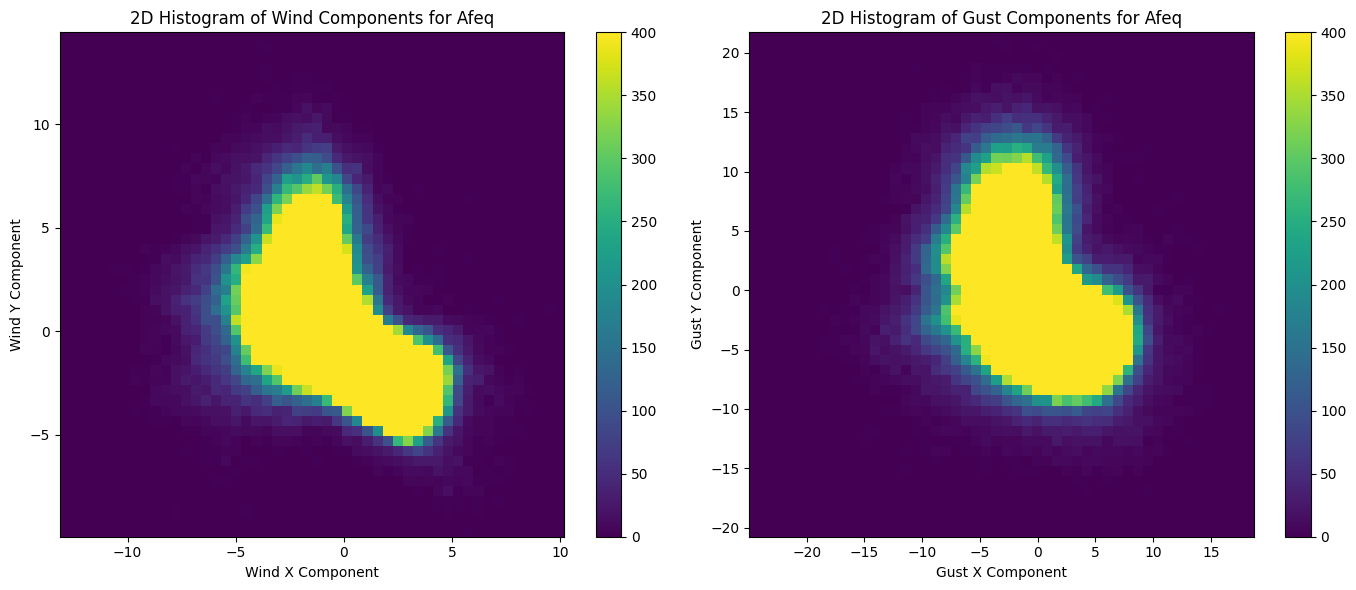

In [7]:
# Plot 2D histogram plots of the wind ('Wind_x', 'Wind_y') and gust ('Gust_x', 'Gust_y') for the first dataframe
first_df_name = list(dataframes.keys())[0]
first_df = dataframes[first_df_name]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Mask to filter out NaN values for wind
mask_wind = first_df['Wind_x'].notna() & first_df['Wind_y'].notna()

# Create the 2D histogram plot for wind
hist_wind = ax[0].hist2d(first_df.loc[mask_wind, 'Wind_x'], first_df.loc[mask_wind, 'Wind_y'], bins=(50, 50), vmax=400)
fig.colorbar(hist_wind[3], ax=ax[0])
ax[0].set_xlabel('Wind X Component')
ax[0].set_ylabel('Wind Y Component')
ax[0].set_title(f'2D Histogram of Wind Components for {first_df_name}')

# Mask to filter out NaN values for gust
mask_gust = first_df['Gust_x'].notna() & first_df['Gust_y'].notna()

# Create the 2D histogram plot for gust
hist_gust = ax[1].hist2d(first_df.loc[mask_gust, 'Gust_x'], first_df.loc[mask_gust, 'Gust_y'], bins=(50, 50), vmax=400)
fig.colorbar(hist_gust[3], ax=ax[1])
ax[1].set_xlabel('Gust X Component')
ax[1].set_ylabel('Gust Y Component')
ax[1].set_title(f'2D Histogram of Gust Components for {first_df_name}')

plt.tight_layout()
plt.show()

# Show and Save

## Display

### heads:

In [ ]:
# Display the head of all dataframes in the dataframes dictionary
for df_name, df in dataframes.items():
    print(f"DataFrame: {df_name}")
    display(df.head())

### time:

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot the Day sin and cos on the first subplot
ax[0].plot(np.array(df['Day sin'])[:48*6])
ax[0].plot(np.array(df['Day cos'])[:48*6])
ax[0].legend(['Day sin', 'Day cos'])
ax[0].set_xlabel('Time [h]')
ax[0].set_title('Time of 48 hours (2 days) signal')

# Plot the Year sin and cos on the second subplot
ax[1].plot(np.array(df['Year sin'])[:365*2*24*6])
ax[1].plot(np.array(df['Year cos'])[:365*2*24*6])
ax[1].legend(['Year sin', 'Year cos'])
ax[1].set_xlabel('Time [h]')
ax[1].set_title('Time of 2 years signal')
plt.show()

## Save Changes

#### csv:

In [14]:
# Save the dataframes back to CSV files with the changes made
# for df_name, df in tqdm(dataframes.items(), desc="Saving DataFrames"):
    # file_path = os.path.join(DATA_DIRECTORY, f"{df_name}.csv")
    # df.to_csv(file_path, index=False)

Saving DataFrames: 100%|██████████| 70/70 [22:39<00:00, 19.42s/it]


#### pickle:

In [16]:
# Save the dataframes to pickle files in the directory ../pickles/
os.makedirs(DATA_DIRECTORY, exist_ok=True)

for df_name, df in tqdm(dataframes.items(), desc="Saving DataFrames to Pickle"):
    file_path = os.path.join(DATA_DIRECTORY, f"{df_name}.pkl")
    df.to_pickle(file_path)


Saving DataFrames to Pickle: 100%|██████████| 70/70 [01:06<00:00,  1.05it/s]
